In [1]:
#modul-modul yang dibutuhkan
import mesa_reader as ms
import matplotlib.pyplot as plt

In [2]:
#variabel untuk bintang bermassa sedang tanpa OV
h_2m = ms.MesaData('LOGS_2Msun [NO OV]/trimmed_history.data')
h_3m = ms.MesaData('LOGS_3Msun [NO OV]/trimmed_history.data')
h_4m = ms.MesaData('LOGS_4Msun [NO OV]/trimmed_history.data')
h_5m = ms.MesaData('LOGS_5Msun [NO OV]/trimmed_history.data')
h_6m = ms.MesaData('LOGS_6Msun [NO OV]/trimmed_history.data')
h_7m = ms.MesaData('LOGS_7Msun [NO OV]/trimmed_history.data')
h_8m = ms.MesaData('LOGS_8Msun [NO OV]/trimmed_history.data')


#variabel untuk bintang bermassa sedang dengan OV
h_2m_OV = ms.MesaData('LOGS_2Msun [OV]/trimmed_history.data')
h_3m_OV = ms.MesaData('LOGS_3Msun [OV]/trimmed_history.data')
h_4m_OV = ms.MesaData('LOGS_4Msun [OV]/trimmed_history.data')
h_5m_OV = ms.MesaData('LOGS_5Msun [OV]/trimmed_history.data')
h_6m_OV = ms.MesaData('LOGS_6Msun [OV]/trimmed_history.data')
h_7m_OV = ms.MesaData('LOGS_7Msun [OV]/trimmed_history.data')
h_8m_OV = ms.MesaData('LOGS_8Msun [OV]/trimmed_history.data')

star mass: 8
show carbon core burning? Y/N: y
show hydrogen shell burning? Y/N: y


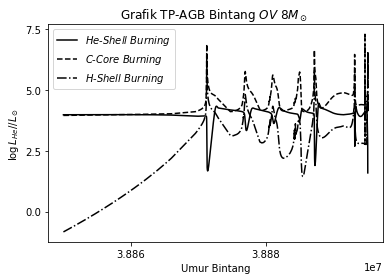

In [15]:
#Grafik Siklus Denyutan Termal untuk beragam massa bintang pada fase TP-AGB

#list untuk menampung data mulai dari awal fase TP-AGB bintang sampai akhir evolusinya
star_age_TP_AGB, log_LHe_TP_AGB, log_LZ_TP_AGB, log_LH_TP_AGB = [], [], [], []


def TP_AGB_graph(var, conditions):
    ask_mass = input('star mass: ')
    ask_LZ = input('show carbon core burning? Y/N: ')
    ask_LH = input('show hydrogen shell burning? Y/N: ')


    for i in range(1, len(var.star_age)):
        if(var.data('log_L')[i]>conditions):
            star_age_TP_AGB.append(var.data_at_model_number('star_age',i))
            log_LHe_TP_AGB.append(var.data_at_model_number('log_LHe',i))
            
            if((ask_LZ.upper() == 'Y') & (ask_LH.upper() == 'Y')):
                log_LH_TP_AGB.append(var.data_at_model_number('log_LH',i))
                log_LZ_TP_AGB.append(var.data_at_model_number('log_LZ',i))
            elif((ask_LZ.upper() == 'Y') & (ask_LH.upper() == 'N')):
                log_LZ_TP_AGB.append(var.data_at_model_number('log_LZ',i))
            elif((ask_LH.upper() == 'Y') & (ask_LZ.upper() == 'N')):
                log_LH_TP_AGB.append(var.data_at_model_number('log_LH',i))
            continue
                    
        
    plt.title(f'Grafik TP-AGB Bintang $\itOV$ {ask_mass}$M_\odot$ ')    
    plt.locator_params(nbins=4)
    plt.xlabel('Umur Bintang')
    plt.ylabel(r'$\log\,L_{He}//L_\odot$')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.plot(star_age_TP_AGB, log_LHe_TP_AGB, c='black', label=r'$\itHe$-$\itShell$ $\itBurning$')
    try:       
        plt.plot(star_age_TP_AGB, log_LZ_TP_AGB, c='black', linestyle='dashed', label='$\itC$-$\itCore$ $\itBurning$ ')
        plt.legend()
    except:
        pass
    try:
        plt.plot(star_age_TP_AGB, log_LH_TP_AGB, c='black', linestyle='dashdot', label=r'$\itH$-$\itShell$ $\itBurning$')
        plt.legend()
    except:
        pass
    plt.show()


#######################################
#LIST CONDITIONS BUKAN UNTUK DIOLAH#
#######################################

#indeks 0 untuk bintang NOOV bermassa 2, indeks 1 bermassa 3, dst...
#####conditions = [3.3, 3.48, 3.9, 4.3, 4.33, 4.2, 4.3]    


#indeks 0 untuk bintang OV bermassa 2, indeks 1 bermassa 3, dst...
#####conditions_OV = [3.3, 3.6, 4.17, 4.3, 4.33, 4.2, 4.3]  

#parameter: variable tanpa OV, conditions untuk luminositas
TP_AGB_graph(h_8m_OV, 4.3) #memanggil fungsi